# Assignment 57, Circular Drumhead
## TODO:

### 1. Find the wave numbers, for m = 0, 1, . . . and n = 1, 2, . . . , 5 of the independent modes defined in Eq. (13.206):

$$a^{(1)}_{mn}(\phi, r) = \cos(m\phi) J_{m}(k_{mn}r)$$

$$a^{(2)}_{mn}(\phi, r) = \sin(m\phi) J_{m}(k_{mn}r)$$


### 2. Make contour plots of the corresponding basis states.



Let's recall whence the expressions in eq 13.206 are derived.

We have the helmholtz equation:

$$\nabla^{2}a = -k^{2}a$$

where $$a = a(r, \phi)$$

Insisting on separable solutions to the helmholtz equation - i.e., solutions where the function $a(r, \phi)$ factors as $R(r)\Phi(\phi)$ - leads to the conclusion that solutions are of the form

$$\Phi(\phi) = e^{\pm i m \phi}, \ \ m \in \mathbf{N}_{0}$$

and 

$$ R(r) = J_{m}(kr) $$

where $J_{m}(x)$ denotes the bessel function of the first kind that which is the solution to bessel's differential equation (the differential equation in $r$ and $R$ that arises out of the assumption of separable solutions to the helmholtz equation). 

Note that the bessel functions that give $R(r)$ are here indexed by $m$, which is the separation constant that falls out of the separable variables solution to the helmholtz equation. We have an indepdendent set of separable solutions to that equation for each choice of $m \in \mathbf{N}_{0}$. Thus, the most general solution will be a sum over all of the countably infinite particular solutions for particular values of $m \in \mathbf{N}_{0}$. 

So let $m = \mu$ be some particular non-negative integer. For $n \in \{1, 2, 3, 4, 5\}$, we have

$$a^{(1)}_{\mu}(\phi, r) = \sum_{n = 1}^{5} \cos(\mu\phi) J_{\mu}(k_{\mu n}r) = \cos(\mu\phi) \sum_{n = 1}^{5}J_{\mu}(k_{\mu n}r)$$

and 

$$a^{(2)}_{\mu}(\phi, r) = \sum_{n = 1}^{5} \sin(\mu \phi) J_{\mu}(k_{\mu n}r) =  \sin(\mu \phi) \sum_{n = 1}^{5}J_{\mu}(k_{\mu n}r)$$

Thus the full solution - for $n \in \{1, 2, 3, 4, 5\}$ - can be expressed as 

$$u(r, \phi, t) = \sum_{\mu}^{\infty}( a^{(1)}_{\mu}(\phi, r) + a^{(2)}_{\mu}(\phi, r) ) \cdot e^{\pm i\omega t}$$

$$=\sum_{\mu}^{\infty} (\cos(\mu\phi) \sum_{n = 1}^{5}J_{\mu}(k_{\mu n}r) + \sin(\mu \phi) \sum_{n = 1}^{5}J_{\mu}(k_{\mu n}r)) \cdot e^{\pm i\omega t}$$

In [1]:
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

M = 2
N = 5

K = list(map(jn_zeros, range(M), [N for i in range(M)]))

fig_size = 10
n_grid = 100

# linspace includes the endpoint 360
angs = np.radians(np.linspace(0,360,n_grid))
# arange doesn’t include the endpoint 10.1
radii = np.arange(0,1.0,0.05)
r,phi=np.meshgrid(radii,angs)
values=np.random.random((angs.size, radii.size))

a1 = [lambda r, phi: np.cos(m*phi) * jn(m, K[m][n]*r) for m in range(M) for n in range(N)]
a2 = [lambda r, phi: np.sin(m*phi) * jn(m, K[m][n]*r) for m in range(M) for n in range(N)]

a1_values = [np.array([[a1[i](r, a) for r in radii] for a in angs]) for i in range(len(a1))]
a1_values = np.array(reduce(lambda a11, a12: a11 + a12, a1_values))
a2_values = [np.array([[a2[i](r, a) for r in radii] for a in angs]) for i in range(len(a1))]
a2_values = np.array(reduce(lambda a21, a22: a21 + a22, a2_values))

def plot_basis_func(f_vals, fig_size=fig_size, plt=plt):
    fig,ax=plt.subplots(subplot_kw=dict(projection='polar'), figsize = (fig_size,fig_size))
    ax.contourf(phi,r,f_vals)
    #plt.savefig('ContourPlotExample.png', bbox_inches = 'tight')
    plt.show()
    plt.close()
    
#f = lambda r, a: r* np.cos(4*a)
#f_values = np.array([[f(r,a) for r in radii] for a in angs])

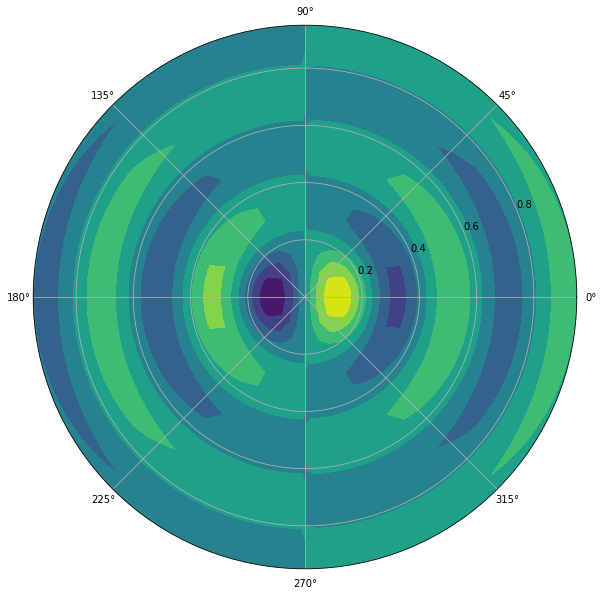

In [2]:
plot_basis_func(a1_values, fig_size=fig_size, plt=plt)

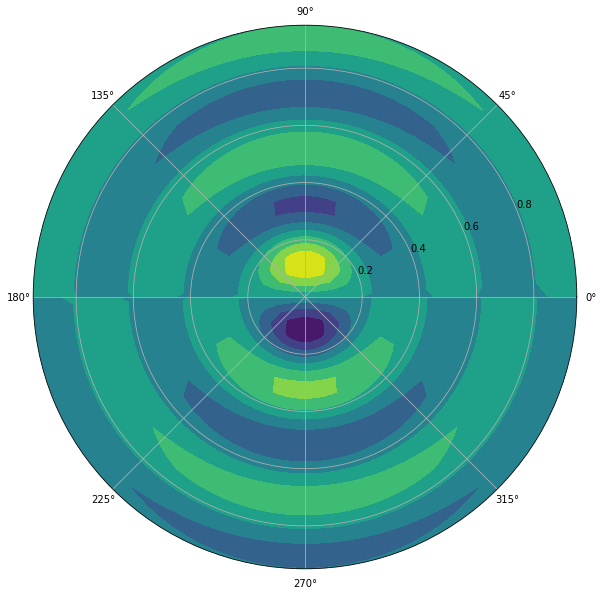

In [3]:
plot_basis_func(a2_values, fig_size=fig_size, plt=plt)

The contour plots above show that the basis functions are - among other things - orthogonal, as we would expect. 